In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import *
%matplotlib inline

sns.set_style('ticks')
sns.set_palette('colorblind')

# Import and read dataset

In [2]:
# Life Expectancy (WHO)
df = pd.read_csv("https://raw.githubusercontent.com/tridims/Project-Internship-BCC/main/Dataset/heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing

## Outlier, missing value, etc

In [8]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

RestingBP_outliers = detect_outliers_iqr(df['RestingBP'])
Cholesterol_outliers = detect_outliers_iqr(df['Cholesterol'])
MaxHR_outliers = detect_outliers_iqr(df['MaxHR'])
Oldpeak_outliers = detect_outliers_iqr(df['Oldpeak'])

In [9]:
df['MaxHR'] = df['MaxHR'].replace([63, 60], [220 - 60, 220 - 51]) # Replace MaxHR outlier dengan 220 dikurang umur
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].mean())
df = df[~df.Cholesterol.isin(Cholesterol_outliers)] # drop
df = df[df.Oldpeak >= 0] # drop minus value

## Encoding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    float64
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 74.5+ KB


#### Label encoder

target : 'RestingECG', 'ExerciseAngina', 'ST_Slope'

In [11]:
label_encoder = preprocessing.LabelEncoder()
df_encode = df.copy()

In [12]:
def label_encode_data(dataset, cols):
  for columns in cols:
    dataset[columns] = label_encoder.fit_transform(dataset[columns])

label_encode_data(df_encode, ['RestingECG', 'ExerciseAngina', 'ST_Slope'])


In [16]:
df_encode.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,1,172,0,0.0,2,0
1,49,F,NAP,160.0,180,0,1,156,0,1.0,1,1
2,37,M,ATA,130.0,283,0,2,98,0,0.0,2,0
3,48,F,ASY,138.0,214,0,1,108,1,1.5,1,1
4,54,M,NAP,150.0,195,0,1,122,0,0.0,2,0


#### One hot encoding

targetnya : 'Sex', 'ChestPainType'

In [19]:
# create function to one hot encoding dataset on columns
def onehot_encode_data(dataset, cols):
  for columns in cols:
    dataset = pd.concat([dataset, pd.get_dummies(dataset[columns], prefix=columns)], axis=1)
    dataset = dataset.drop(columns, axis=1)
  return dataset

df_encode = onehot_encode_data(df_encode, ['Sex', 'ChestPainType'])


In [21]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140.0,289,0,1,172,0,0.0,2,0,0,1,0,1,0,0
1,49,160.0,180,0,1,156,0,1.0,1,1,1,0,0,0,1,0
2,37,130.0,283,0,2,98,0,0.0,2,0,0,1,0,1,0,0
3,48,138.0,214,0,1,108,1,1.5,1,1,1,0,1,0,0,0
4,54,150.0,195,0,1,122,0,0.0,2,0,0,1,0,0,1,0


In [20]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                734 non-null    int64  
 1   RestingBP          734 non-null    float64
 2   Cholesterol        734 non-null    int64  
 3   FastingBS          734 non-null    int64  
 4   RestingECG         734 non-null    int64  
 5   MaxHR              734 non-null    int64  
 6   ExerciseAngina     734 non-null    int64  
 7   Oldpeak            734 non-null    float64
 8   ST_Slope           734 non-null    int64  
 9   HeartDisease       734 non-null    int64  
 10  Sex_F              734 non-null    uint8  
 11  Sex_M              734 non-null    uint8  
 12  ChestPainType_ASY  734 non-null    uint8  
 13  ChestPainType_ATA  734 non-null    uint8  
 14  ChestPainType_NAP  734 non-null    uint8  
 15  ChestPainType_TA   734 non-null    uint8  
dtypes: float64(2), int64(8), u

Text(0.5, 1.0, 'Shifted Linear Correlation Matrix')

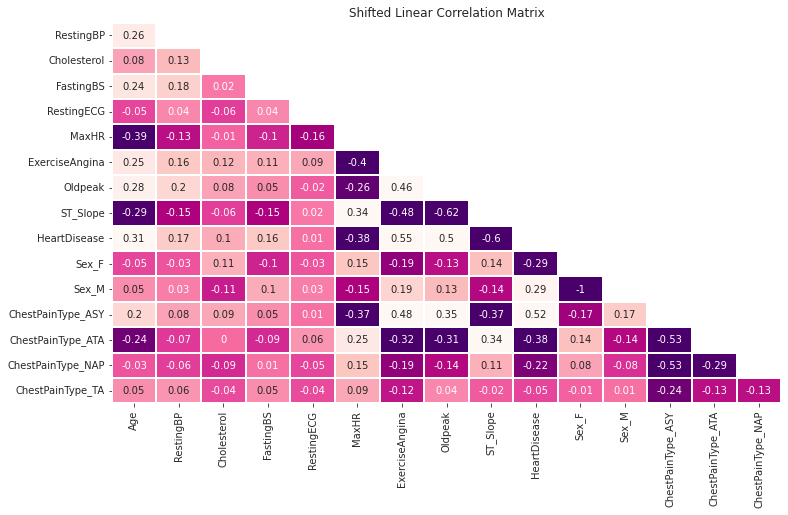

In [23]:
# shifted correlation matrix

corr_mat = df_encode.corr().round(2)
f, ax = plt.subplots(figsize=(12,7))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
mask = mask[1:,:-1]
corr = corr_mat.iloc[1:,:-1].copy()
sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
            cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
ax.set_title('Shifted Linear Correlation Matrix')


# Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encode)
df_scaled = pd.DataFrame(df_scaled, columns=df_encode.columns)


In [32]:
df_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.244898,0.444444,0.633540,0.0,0.5,0.770992,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.428571,0.629630,0.295031,0.0,0.5,0.648855,0.0,0.161290,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.183673,0.351852,0.614907,0.0,1.0,0.206107,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.408163,0.425926,0.400621,0.0,0.5,0.282443,1.0,0.241935,0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.530612,0.537037,0.341615,0.0,0.5,0.389313,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_std = scaler.fit_transform(df_encode)
df_scaled_std = pd.DataFrame(df_scaled_std, columns=df_encode.columns)

# Saving dataset

In [24]:
df_encode.to_csv('./Dataset/heart_encode.csv', index=False)

In [33]:
df_scaled.to_csv('./Dataset/heart_encode_scaled.csv', index=False)